# Xiaofu Liu - Data Analysis and Visualization

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

Read all dataset

In [3]:
df = pd.read_csv('BIHomework/NEISS2014.csv', sep=',')
bp = pd.read_csv('BIHomework/BodyParts.csv', sep=',')
dc = pd.read_csv('BIHomework/DiagnosisCodes.csv', sep=',')
dp = pd.read_csv('BIHomework/Disposition.csv', sep=',')

Create dictionaries of body part, diagnosis, and disposition

In [4]:
bp = bp.set_index('Code')['BodyPart'].to_dict()
dc = dc.set_index('Code')['Diagnosis'].to_dict()
dp = dp.set_index('Code')['Disposition'].to_dict()

# Question 1: 

### What are the top three body parts most frequently represented in this dataset?

In [5]:
most_3 = df.groupby('body_part').size().sort_values(ascending=False)[:3]
most_3.rename(index=bp)

body_part
Head      9891
Face      5786
Finger    5783
dtype: int64

### Whate are the top three body parts that are least frequently represented?

In [6]:
least_3 = df.groupby('body_part').size().sort_values(ascending=True)[:3]
least_3.rename(index=bp)

body_part
25-50% of body      4
Pubic region      286
Not Recorded      390
dtype: int64

# Question 2: 

### How many injuries in this dataset involve a skateboard?

In [7]:
df['narrative'].str.contains('SKATEBOARD', case=False).sum()

466

In [8]:
skateboard = df[df['narrative'].str.contains('SKATEBOARD', case=False)]

### Of those injuries, what percentage were male and what percentage were female?

In [9]:
df.groupby('sex').size().apply(lambda x: float(x) / df.groupby('age').size().sum()*100)

sex
Female    45.796119
Male      54.203881
dtype: float64

### What was the average age of someone injured in an incident involving a skateboard?

In [10]:
skateboard['age'].mean()

17.991416309012877

# Question 3: 

### What diagnosis had the highest hospitalization rate? 

Create a function to find the diagnosis that had the highest rate of a particular disposition

In [11]:
def by_diagnosis(n):
    group = df[df['disposition']==n]
    q3= group.groupby('diag').size()/df.groupby('diag').size()
    return q3.sort_values(ascending=False)[:1]

Find the diagnosis that had the highest hospitalization rate 

In [12]:
by_diagnosis(4).rename(index=dc)

diag
Submersion (including Drowning)    0.425926
dtype: float64

### What diagnosis most often concluded with the individual leaving without being seen?

In [13]:
by_diagnosis(6).rename(index=dc)

diag
Poisoning    0.033149
dtype: float64

### Briefly discuss your findings and any caveats you'd mention when discussing this data:


Find the diagnosis that had the largest number of hospitalization

In [14]:
df[df['disposition']==4].groupby('diag').size().sort_values(ascending=False)[:10].rename(index=dc)

diag
Fracture                   1811
Internal organ injury       630
Other/Not Stated            613
Contusions, Abrasions       217
Laceration                  185
Poisoning                    88
Concussions                  70
Ingested foreign object      56
Strain or Sprain             43
Dislocation                  43
dtype: int64

From the above result, we could see that: (1) The diagnosis that had the largest number of hospitalization is not the same diagnosis that had the highest hospitalization rate. Submersion injury did not always happen, but once it happens, the patient always need be treated and admitted for hospitalization. (2) Poisoning is the diagnosis that are most often concluded with the individual leaving without being seen. It seems like that some poisoned patients didn't want to be treated, which makes me think that they were sent to the hospital because of attempted suicide. (3) Fracture, internal organ injury, contusions, abrasions are all very serious injuries that needed hospitalization. (4) For question2, there is not a big difference between male and female for the injuries involved a skateboard. Besides, young people are more likely to have this kind of injury. Obviously, young people are more interested in skateboard activities.

# Question 4: Visualization

### 1. Look at how age is distributed amongst all reported injuries.

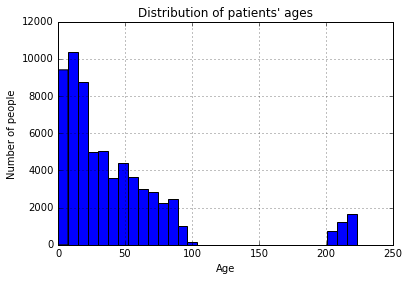

In [15]:
df['age'].hist(bins=30)
plt.title("Distribution of patients' ages")
plt.ylabel('Number of people')
plt.xlabel('Age');

According to NEISS manual, for children under two years old, their ages are recorded as 200+, so in this case, we convert all of them to years.

In [16]:
df['real_age']=np.where(df['age']>200, (df['age']-200)//12, df['age'])

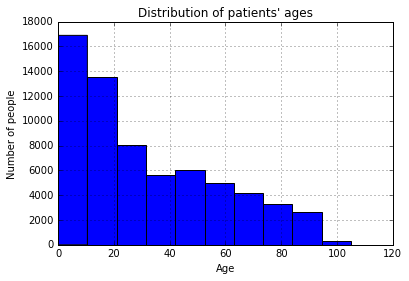

In [17]:
df['real_age'].hist(bins=10)
plt.title("Distribution of patients' ages")
plt.ylabel('Number of people')
plt.xlabel('Age');

#### Findings: From the above plot, we can see that babies and toddlers get injured the most, and generally, the frequency decreased by age.

### 2. Analyze reported injuries by age and sex

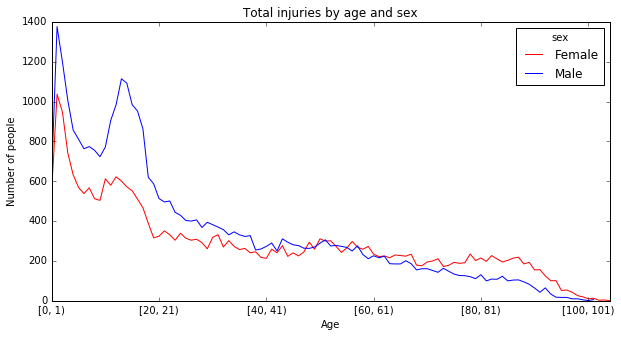

In [18]:
age_sex = pd.DataFrame(df, columns=['real_age','sex'])
age_sex['real_age'] = pd.cut(age_sex.real_age, range(0, 121, 1), right=False)
age_sex1 = age_sex.groupby(['real_age','sex']).size()
age_sex1.unstack().plot(figsize=(10, 5), color=['r','b'])
plt.title("Total injuries by age and sex")
plt.ylabel('Number of people')
plt.xlabel('Age')

#### Findings: The injuries are higher for old women than old men, while boys are more likely to get injured than girls. The reasons might be that boys are more naughty than girls and can easily hurt themselves, and parents would care for girls more than boys. Besides, the number of female patients and male patients are similarly low in the middle age, which means they both can protect themselves well during this period. 

### 3. Analyze the relationship between age group and diagnosis

Binning the age of injuries

In [19]:
labels = ['0-19', '20-39', '40-59', '60-79', '80-99', '100-119']
df['age_group'] = pd.cut(df.real_age, range(0, 121, 20), right=False, labels=labels)
df[['real_age', 'age_group']].drop_duplicates()[:5]

,real_age,age_group
0,21,20-39
1,62,60-79
3,30,20-39
4,16,0-19
5,22,20-39


Analyze the relationship between age group and diagnosis

In [20]:
age_diag = pd.DataFrame(df, columns=['age_group','diag'])

In [21]:
age_diag['diag'] = age_diag['diag'].map(dc)

In [22]:
age_diag1 = age_diag.groupby(['age_group','diag']).size().unstack()

Only get diagnosis that has the top 10 highest average number of injuries

In [23]:
age_diag2 = age_diag1.mean().sort_values(ascending=False)[:10]
age_diag2

diag
Strain or Sprain         2065.200000
Laceration               2051.166667
Contusions, Abrasions    1774.333333
Fracture                 1622.500000
Other/Not Stated         1353.333333
Internal organ injury     884.333333
Concussions               299.000000
Foreign body              254.000000
Dislocation               197.600000
Poisoning                 144.800000
dtype: float64

Visualize the relationship between age group and diagnosis

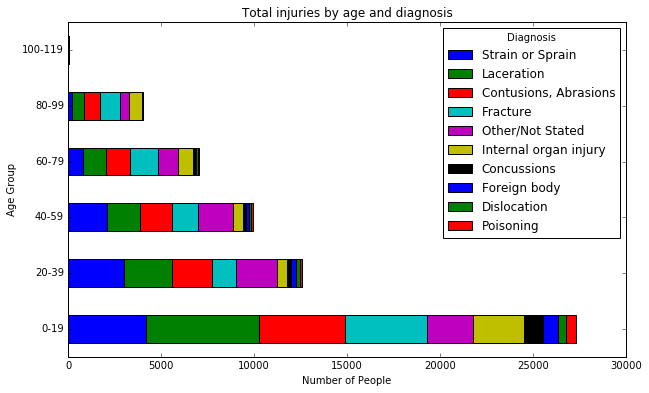

In [24]:
age_diag1 = pd.DataFrame(age_diag1, columns=age_diag2.index)
age_diag1.plot.barh(figsize=(10, 6), stacked=True)
plt.title("Total injuries by age and diagnosis")
plt.xlabel('Number of People')
plt.ylabel('Age Group')
plt.legend(title ='Diagnosis')

#### Findings: For the top 5 injuries by age, strain or sprain and laceration injury decrease with age, while fracture, contusions, and abrasions injury are relatively similar among middle and old ages. 

### 4. Analyze reported injuries with top four most frequently injured body parts by age and sex

In [25]:
age_bp_sex = pd.DataFrame(df, columns=['age_group','sex','body_part'])
age_bp_sex['body_part'] = age_bp_sex['body_part'].map(bp)

According to the results in Question 1, selected Head, Face, Finger, (Trunk, lower) as the top four most frequently injured body parts

In [26]:
age_bp_sex1 = age_bp_sex[age_bp_sex['body_part']=='Head'].groupby(['age_group','sex']).size()
age_bp_sex2 = age_bp_sex[age_bp_sex['body_part']=='Face'].groupby(['age_group','sex']).size()
age_bp_sex3 = age_bp_sex[age_bp_sex['body_part']=='Finger'].groupby(['age_group','sex']).size()
age_bp_sex4 = age_bp_sex[age_bp_sex['body_part']=='Trunk, lower'].groupby(['age_group','sex']).size()

Create subplot and visualize the result

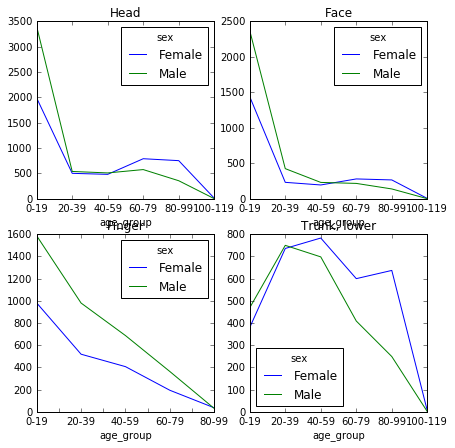

In [27]:
fig, axes = plt.subplots(nrows=2, ncols=2)
age_bp_sex1.unstack().plot(ax=axes[0,0],figsize=(7, 7)); axes[0,0].set_title('Head');
age_bp_sex2.unstack().plot(ax=axes[0,1]); axes[0,1].set_title('Face');
age_bp_sex3.unstack().plot(ax=axes[1,0]); axes[1,0].set_title('Finger');
age_bp_sex4.unstack().plot(ax=axes[1,1]); axes[1,1].set_title('Trunk, lower');

#### Findings: The distributions of these injuries are quite different. The people getting head injured have ages in the range where the distribution of ages is fairly flat so the two plots look mostly the same. There are many babies and toddlers getting their face injured, and the adults seem to protect their faces well. Males are more likely to get their fingers hurt than female, which may because women are more focus on extrinsic decoration and protection, like manicures. Besides, different from many other injuries, adults are more likely to hurt their trunk than children and old people. I suppose it is because adults play more and exercise more. 

# Question 5:  Investigate the data however you like and discuss any interesting insights you can find in the data

### Interested point: Where the injuries occur?

Create a new dictionary called location. Information extracted from NEISS manual.

In [28]:
lc = {1:'Home', 2:'Farm/ranch', 4:'Street or highway', 5:'Other public property',6:'Mobile/Manufactured, home', 7:'Industrial', 8:'School/Daycare', 9:'Place of recreation or sports', 0:'Not recorded'}

In [29]:
age_sex_lc = pd.DataFrame(df, columns=['age_group','sex','location'])
age_sex_lc['location'] = age_sex_lc['location'].map(lc)

Create a plot to visualize the relationship between location and injuries.

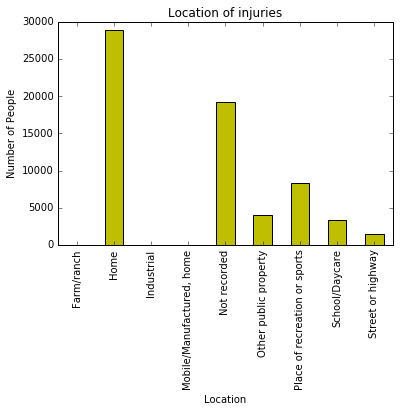

In [30]:
age_sex_lc.groupby('location').size().plot.bar(figsize=(6,4), color='y')
plt.title('Location of injuries')
plt.xlabel('Location')
plt.ylabel('Number of People')

#### The plot tells us that our Homes are very dangerous place! Therefore, although you may get injured outside your house, but you are more likely to get hurt at home!

### Is it different for males and females?

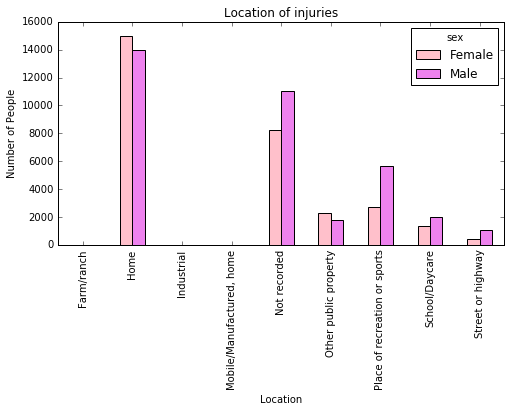

In [31]:
age_sex_lc.groupby(['location','sex']).size().unstack().plot.bar(color=['pink','violet'], figsize=(8,4))
plt.title('Location of injuries')
plt.xlabel('Location')
plt.ylabel('Number of People')

#### Except for injuries at home, injuries at other public property, place of recreation or sports, school/daycare, and street or highway are all higher for males than females. 

### Location of injuries and the changes for different ages and sex.

According to the above result, the top four locations of injuries that are not “not recorded” are Home, Place of recreation or sports, Other public property, and School/Daycare. So I will look at these places and explore how the population distributed by different sex and age group.

In [32]:
age_sex_lc1 = age_sex_lc[age_sex_lc['location']=='Home'].groupby(['age_group','sex']).size()
age_sex_lc2 = age_sex_lc[age_sex_lc['location']=='Place of recreation or sports'].groupby(['age_group','sex']).size()
age_sex_lc3 = age_sex_lc[age_sex_lc['location']=='Other public property'].groupby(['age_group','sex']).size()
age_sex_lc4 = age_sex_lc[age_sex_lc['location']=='School/Daycare'].groupby(['age_group','sex']).size()

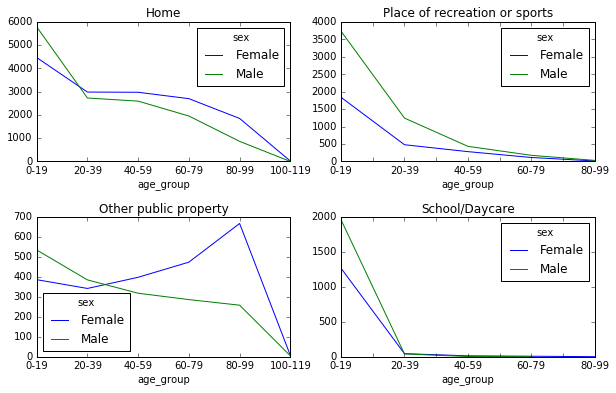

In [33]:
fig, axes = plt.subplots(nrows=2, ncols=2)
age_sex_lc1.unstack().plot(ax=axes[0,0],figsize=(10, 6)); axes[0,0].set_title('Home');
age_sex_lc2.unstack().plot(ax=axes[0,1]); axes[0,1].set_title('Place of recreation or sports');
age_sex_lc3.unstack().plot(ax=axes[1,0]); axes[1,0].set_title('Other public property');
age_sex_lc4.unstack().plot(ax=axes[1,1]); axes[1,1].set_title('School/Daycare');
plt.subplots_adjust(wspace =0.2, hspace=0.4)

#### Teenagers are getting injured at school and at sports/recreation locations, while the elderly are getting injured at home and in public. Elderly seldomly go to recreation/sports locations or schools, so their injury rate in those areas are very low. Here again we see that no matter in what locations, elderly women are injured at a higher rate than elderly men.

In [34]:
table = pd.pivot_table(age_sex_lc[['sex','location']], index=['location'], columns=['sex'], aggfunc=np.size, fill_value=0)

In [35]:
table['All'] = table.Female + table.Male
table['Diff'] = table.Female - table.Male
table.head()

sex,Female,Male,All,Diff
location,,,,
Farm/ranch,18,18,36,0
Home,30024,27882,57906,2142
Industrial,4,6,10,-2
"Mobile/Manufactured, home",18,12,30,6
Not recorded,16430,22060,38490,-5630


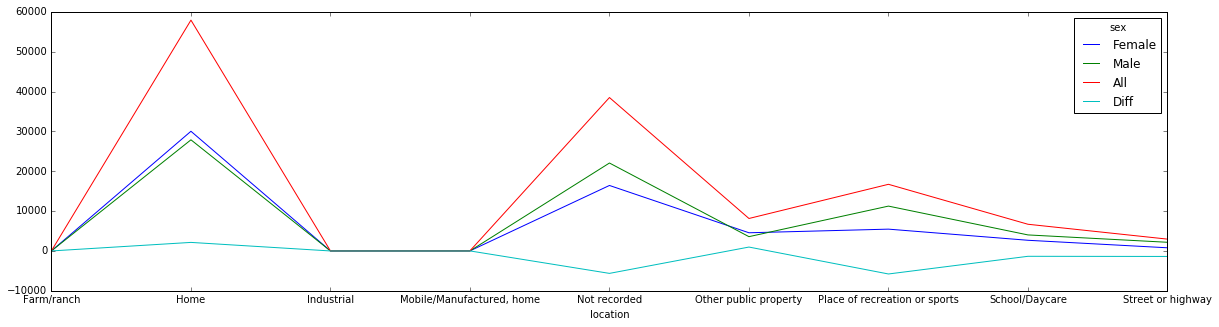

In [36]:
table.plot(figsize=(20,5))

#### From the above table and chart, we can see that the injuries rate at home are much more higher for female than male, which may indicate that women always need to do many housework that involves injuries, while men tend to relax at home. And the number of male injuries in industrial area is greater than female since in industrial area male workers are more than female workers. 

### Analyze relationship amongst different body parts, sex and location.

In [37]:
bp_sex_lc = pd.DataFrame(df, columns=['body_part','sex','location'])
bp_sex_lc['location'] = bp_sex_lc['location'].map(lc) 
bp_sex_lc['body_part'] = bp_sex_lc['body_part'].map(bp) 

In [38]:
pivoted = pd.pivot_table(bp_sex_lc, index=['body_part'], columns=['location','sex'], aggfunc=np.size, fill_value=0)

In [39]:
pivoted.head()

location       Farm/ranch        Home       Industrial       \
sex                Female Male Female  Male     Female Male   
body_part                                                     
25-50% of body          0    0      3     9          0    0   
>50% of body            0    0   1353  1218          0    0   
Ankle                   0    0   2253  1182          0    0   
Arm, lower              3    0   1650  1518          3    0   
Arm, upper              3    0    705   417          0    0   

location       Mobile/Manufactured, home      Not recorded        \
sex                               Female Male       Female  Male   
body_part                                                          
25-50% of body                         0    0            0     0   
>50% of body                           3    0          423   486   
Ankle                                  6    0         1761  1821   
Arm, lower                             0    0          858  1353   
Arm, upper                             0    0          240   261   

location       Other public property      Place of recreation or sports        \
sex                           Female Male                        Female  Male   
body_part                                                                       
25-50% of body                     0    0                             0     0   
>50% of body                     120  132                           120   216   
Ankle                            336  129                           987  1647   
Arm, lower                       150  156                           471   813   
Arm, upper                       150   48                            69   165   

location       School/Daycare      Street or highway       
sex                    Female Male            Female Male  
body_part                                                  
25-50% of body              0    0                 0    0  
>50% of body               78   66                 6   45  
Ankle                     471  498                84  168  
Arm, lower                174  309                57  168  
Arm, upper                 48   63                18   48

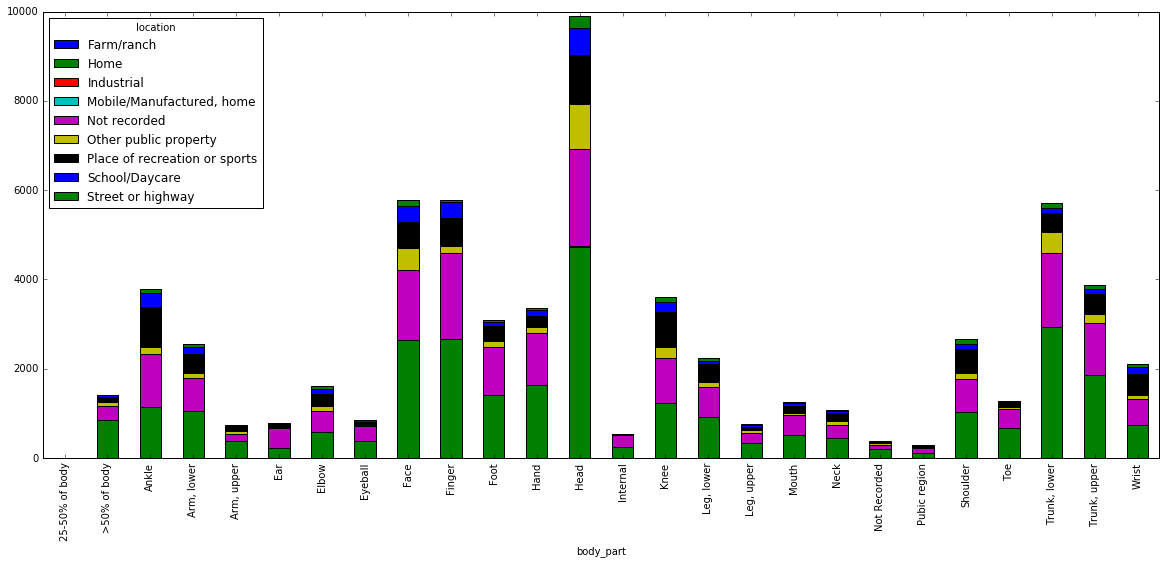

In [40]:
lc_bp = bp_sex_lc.groupby(['body_part','location']).size().unstack()
lc_bp.fillna(0).plot.bar(figsize=(20, 8),stacked=True)

#### Both from the pivot table and the stacked bar plot, we can see that, almost every parts of our body can easily get injured at home, face and head share similar injury rates, but in public property, the rate of face injured are higher than finger injured. And in recreation/sports place, ankle and knee are more often to get injured than other body parts.

# Thanks for reading, hope you enjoy my analysis and visualization! 